<a href="https://colab.research.google.com/github/JaskeeratK/Heart-Disease-Prediction-Model/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/sample_data/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
 df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [13]:
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df['ChestPainType']=lb.fit_transform(df['ChestPainType'])
df['RestingECG']=lb.fit_transform(df['RestingECG'])
df['ExerciseAngina']=lb.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=lb.fit_transform(df['ST_Slope'])


In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [30]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


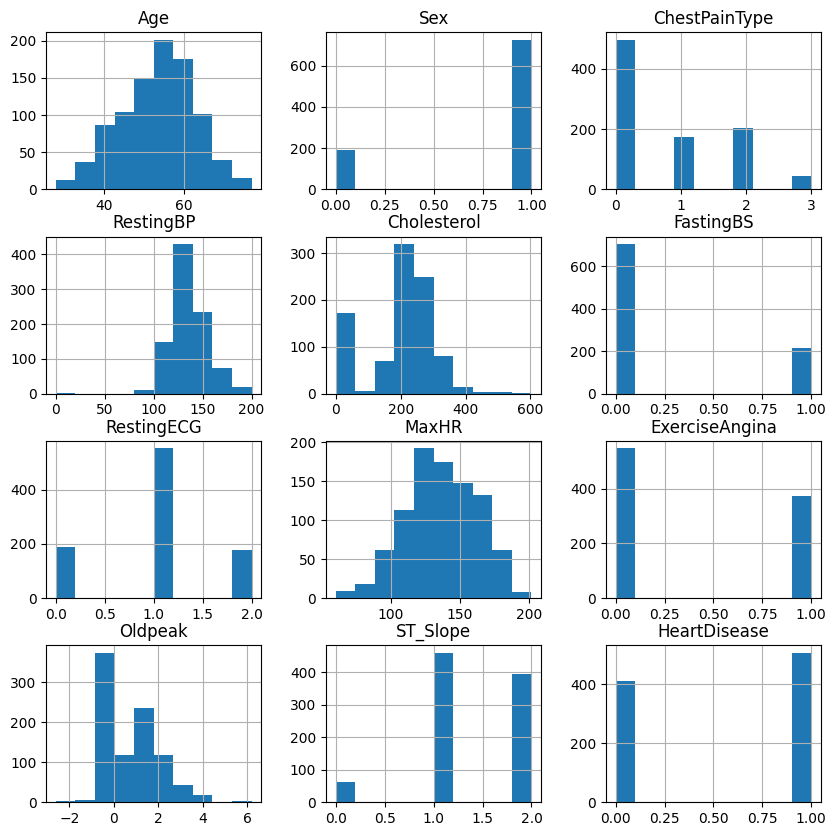

In [16]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [18]:
X=df.drop(columns='HeartDisease',axis=1)
Y=df['HeartDisease']

In [19]:
std_scaler=StandardScaler()
std_scaler.fit(X)

StandardScaler()

In [20]:
std_data=std_scaler.transform(X)

In [21]:
X=std_data
Y=df['HeartDisease']

In [23]:
print(X)

[[-1.4331398   0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 [-0.47848359 -1.93816322  1.27505906 ... -0.8235563   0.10566353
  -0.59607813]
 [-1.75135854  0.51595242  0.22903206 ... -0.8235563  -0.83243239
   1.05211381]
 ...
 [ 0.37009972  0.51595242 -0.81699495 ...  1.21424608  0.29328271
  -0.59607813]
 [ 0.37009972 -1.93816322  0.22903206 ... -0.8235563  -0.83243239
  -0.59607813]
 [-1.64528563  0.51595242  1.27505906 ... -0.8235563  -0.83243239
   1.05211381]]


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [27]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [28]:
Y_predict=dtc.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
accuracy_dtc=accuracy_score(Y_predict,Y_test)
precision_dtc=precision_score(Y_predict,Y_test)
recall_dtc=recall_score(Y_predict,Y_test)
print("Accuracy using Decision Tree Model:",accuracy_dtc)
print("Precision using Decision Tree Model:",precision_dtc)
print("Recall using Decision Tree Model:",recall_dtc)

Accuracy using Decision Tree Model: 0.7336956521739131
Precision using Decision Tree Model: 0.7578947368421053
Recall using Decision Tree Model: 0.7346938775510204


In [45]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [46]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [47]:
Y_pred_lr=lr.predict(X_test)

In [49]:
accuracy_lr=accuracy_score(Y_pred_lr,Y_test)
precision_lr=precision_score(Y_pred_lr,Y_test)
recall_lr=recall_score(Y_pred_lr,Y_test)
print("Accuracy using Logistic Regression Model:",accuracy_lr)
print("Precision using Logistic Regression Model:",precision_lr)
print("Recall using Logistic Regression Model:",recall_lr)

Accuracy using Logistic Regression Model: 0.842391304347826
Precision using Logistic Regression Model: 0.8736842105263158
Recall using Logistic Regression Model: 0.83


In [38]:
from sklearn import svm
svm=svm.SVC(kernel='linear')

In [39]:
svm.fit(X_train,Y_train)

SVC(kernel='linear')

In [40]:
Y_pred_svm=svm.predict(X_test)

In [50]:
accuracy_svm=accuracy_score(Y_pred_svm,Y_test)
precision_svm=precision_score(Y_pred_svm,Y_test)
recall_svm=recall_score(Y_pred_svm,Y_test)
print("Accuracy using SVM Model:",accuracy_svm)
print("Precision using SVM Model:",precision_svm)
print("Recall using SVM Model:",recall_svm)

Accuracy using SVM Model: 0.842391304347826
Precision using SVM Model: 0.8736842105263158
Recall using SVM Model: 0.83
